In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
#basic dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#dimention of the dataset
dataset.shape

(10000, 14)

In [9]:
#basic statistics symmary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
#checking for missing values
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

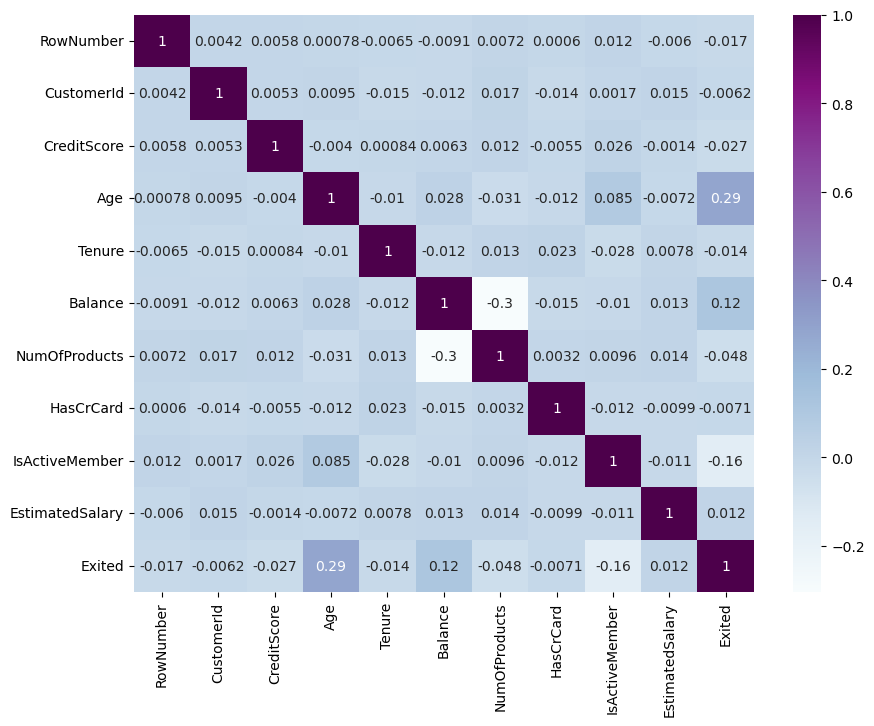

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
corr_var = dataset.select_dtypes(include=['number']).corr()
print(corr_var)

plt.figure(figsize=(10, 7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')
plt.show()

In [12]:
#as there is no importance in cust id, row no and sur name for modelling we are not included here in independent feature
X = dataset.iloc[:, 3:-1].values
#target value
y = dataset.iloc[:, -1].values

In [13]:
#independent features
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
#dependent features
print(y)

[1 0 1 ... 1 1 0]


In [15]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding

#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#gender column in index 2
X[:, 2] = le.fit_transform(X[:, 2])

In [16]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [17]:
#country name wont be that much correlation added it has more than 2 names so go for one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#country name is present in 1st index value
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [19]:
#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#ANN - initializing
ann = tf.keras.models.Sequential()

In [22]:
#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [23]:
#hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [24]:
#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
#compiling
#loss - target is binary 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7408 - loss: 0.5619  
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8019 - loss: 0.4661
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7976 - loss: 0.4454
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4312  
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8097 - loss: 0.4181
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8036 - loss: 0.4227
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8076 - loss: 0.4219
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8107 - loss: 0.4067
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8150 - loss: 0.4035  
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8250 - loss: 0.3889
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8193 - loss: 0.3921  
Epoch 12/50
219/219 ━━━━━━━━━━━━━━

In [27]:
#test result - prediction
y_pred = ann.predict(X_test)
#insted of values we ll get 0 or 1
y_pred = (y_pred > 0.5)
#actual vs prediicted outputs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [28]:
#accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2277  102]
 [ 311  310]]


0.8623333333333333

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 750

Gender: Female

Age: 48 years old

Tenure: 5 years

Balance: $ 62500

Number of Products: 3

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 80000

So, should we say goodbye to that customer ?

In [29]:
#for predicting single sample
print(ann.predict(sc.transform([[1, 0, 0, 750, 0, 48,53, 62500, 3, 1, 1, 80000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[False]]
